## Практическое задание 7

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import scipy
from scipy import stats
from sympy import symbols, diff
import math
warnings.filterwarnings('ignore')

#### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [70]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

##### 1.1. Посчитаем коэффициенты линейной регрессии, используя математические формулы 

In [3]:
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b

2.620538882402765

In [4]:
a = np.mean(ks) - b * np.mean(zp)
a

444.1773573243596

Итак, уравнение регрессии имеет вид (коэффициенты округлены до сотых):

$$y = 444.18 + 2.62 \cdot x$$
Посмотрим на график

In [5]:
ks_pred = a + b*zp

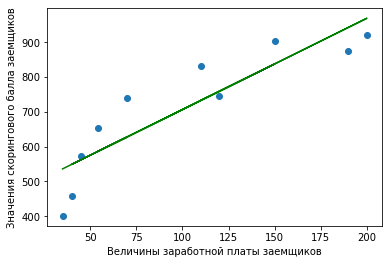

In [6]:
import matplotlib.pyplot as plt

plt.scatter(zp, ks)
plt.plot(zp, ks_pred, color = 'g')
plt.xlabel('Величины заработной платы заемщиков')
plt.ylabel('Значения скорингового балла заемщиков')
plt.show()

Оценим насколько хороша наша модель

Найдем коэффициент корреляции $r$ с помощью коэффициента $b$ и средних квадратического отклонения, посчитанного для массивов $x$ и $y$:

In [7]:
r = b * np.std(zp) / np.std(ks)
r

0.8874900920739162

Видим, что коэффициент корреляции высокий

Найдем коэффициент детерминации $R^2$:

In [8]:
R2 = r**2
R2

0.7876386635293682

Это означает, что 78.8% вариации значения скорингового балла заемщиков ($ks$) объясняется вариацией фактора $zp$ — величины заработной платы заемщиков.

С помощью этого уравнения регрессии посчитаем значения, предсказанные моделью значения скорингового балла заемщиков:

In [9]:
ks_pred = a + b * zp
ks_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

Качество модели найдем с помощью средней ошибки аппроксимации $\overline {A}$:

In [10]:
A_mean = 100 * np.mean(np.abs((ks - ks_pred) / ks))
A_mean

11.46925184356171

Так как $\overline {A}$ равна 11%, что незначительно превышает 8-10 %, модель достаточно хорошо описывает эмпирические данные.  
Для оценки значимости уравнения регрессии воспользуемся F-критерием Фишера. Найдем фактическое значение $F$-критерия ($F_{факт}$):

Среднеквадратическая ошибка

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(ks, ks_pred))
rms

80.43888488272732

Средняя абсолютная ошибка

In [12]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ks, ks_pred)

70.98040656548312

Число измерений n = 10, число параметров р = 2 , α = 0,05
Находим число степеней свободы
df1 = р - 1 = 2 - 1 = 1
df2  = n - р = 10 - 2 = 8

In [13]:
n = len(ks)
F_fact = (r**2 * (n - 2)) / (1 - r**2)
F_fact

29.671640859664432

При 5 % уровне значимости и степенях свободы $k_1 = 1$ и $k_2 = 8$ табличное значение критерия: $F_{кр} = 4.96$.

Так как $F_{факт} = 29.67 > F_{кр} = 4.96$, уравнение регрессии статистически значимо.

Для оценки статистической значимости параметров регрессии воспользуемся $t$-статистикой Стьюдента и также рассчитаем 

доверительные интервалы каждого из показателей. При $df = n - 2 = 10 - 2 = 8$ и $\alpha = 0.05$ получим

(см. <a href='https://statpsy.ru/t-student/t-test-tablica/'>Таблицу критических значений t-критерия Стьюдента</a>):

$$t_{кр} = 2.306$$

Определим стандартную ошибку $S_{ост}$ (переменная **s_residual**) и случайные ошибки $m_a, \; m_b$:

In [14]:
s_residual = np.sqrt(np.sum((ks - ks_pred)**2) / (n - 2))
m_a = s_residual * np.sqrt(np.sum(zp ** 2)) / (n * np.std(zp))
m_b = s_residual / (np.std(zp) * np.sqrt(n))

print('s_residual = {}\nm_a = {}\nm_b = {}'.format(s_residual, m_a, m_b))

s_residual = 89.93340731602925
m_a = 56.466497550681524
m_b = 0.48108279568516


Вычислим наблюдаемые значения критерия $t_a$ и $t_b$:

In [15]:
t_a = a / m_a
t_a

7.866210524668864

In [16]:
t_b = b / m_b
t_b

5.447168150485579

Фактические значения t-статистики больше табличного значения:

$$t_a = 7.87 > t_{кр} = 2.31, \; t_b = 5.45 > t_{кр} = 2.31,$$

поэтому параметры $a$ и $b$ не случайно отличаются от нуля, то есть они статистически значимы.

Рассчитаем доверительные интервалы для параметров регрессии $a$ и $b$. Для этого определим предельную ошибку для каждого показателя ($\Delta_a$ и $\Delta_b$),

используя значение $t_{кр}$, равное 2.306 (переменная **t_cr**):

In [17]:
t_cr = 2.306

In [18]:
delta_a = t_cr * m_a
delta_a

130.2117433518716

In [19]:
delta_b = t_cr * m_b
delta_b

1.109376926849979

Найдем границы доверительных интервалов $\gamma_{a_{min}}, \gamma_{a_{max}}, \gamma_{b_{min}}, \gamma_{b_{max}}$:

In [20]:
gamma_a_min = a - delta_a
gamma_a_min

313.965613972488

In [21]:
gamma_a_max = a + delta_a
gamma_a_max

574.3891006762312

In [22]:
gamma_b_min = b - delta_b
gamma_b_min

1.511161955552786

In [23]:
gamma_b_max = b + delta_b
gamma_b_max

3.729915809252744

Приходим к выводу о том, что с вероятностью $p = 1 - \alpha = 0.95$ параметры $a$ и $b$, находясь в указанных границах, 

являются статистически значимыми и отличны от нуля.

##### 1.2. Посчитаем коэффициенты линейной регрессии, используя численное решение системы уравнений частных производных по коэффициентам a и b



Представим уравнение $y = a + bx$ в неявном виде
### $$y - a - b\cdot x = 0$$

Найдем частные производные

In [24]:
from matplotlib import pylab as plt
import numpy as np
%matplotlib inline
from scipy.optimize import fsolve
import math
xi, yi, a, b =symbols('xi yi a b')
f=(yi - a - b * xi)**2
f

(-a - b*xi + yi)**2

In [25]:
print(f"Производная первого порядка по a: ", diff(f, a))

Производная первого порядка по a:  2*a + 2*b*xi - 2*yi


In [26]:
print(f"Производная первого порядка по b: ", diff(f,b))

Производная первого порядка по b:  -2*xi*(-a - b*xi + yi)


Коэффициенты a = 444.1773573243596, b = 2.6205388824027653


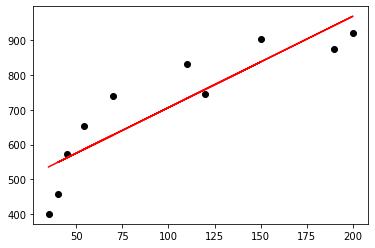

In [27]:
from sympy import *
import math
import pandas as pd
init_printing()
from scipy.optimize import fsolve
xi = zp
yi = ks

def equations(p):
    a, b = p
    # Запись системы уравнений
    return ((-2*xi*(-a - b*xi + yi)).sum(), (2*a + 2*b*xi - 2*yi).sum())

# Численное решение системы уравнений
a, b =  fsolve(equations, (0, 0))
print (f"Коэффициенты a = {a}, b = {b}")

x = zp
y=a+b*x

plt.scatter(xi,yi, c='black')
plt.plot(x,y, c='r')

Из графика расположения точек видно, что они распологаются не по прямой, а на изогнутой линии. Попробуем аппроксимировать точки с помощью квадратного трехчлена

In [28]:
from matplotlib import pylab as plt
import numpy as np
%matplotlib inline
from scipy.optimize import fsolve
import math
xi, yi, a, b, n, d =symbols('xi yi a b n d')
f=(yi - a - b * xi**3 - n*xi**2 - d*xi)**2
f

In [29]:
print(f"Производная первого порядка по a: ", diff(f, a))

Производная первого порядка по a:  2*a + 2*b*xi**3 + 2*d*xi + 2*n*xi**2 - 2*yi


In [30]:
print(f"Производная первого порядка по b: ", diff(f,b))

Производная первого порядка по b:  -2*xi**3*(-a - b*xi**3 - d*xi - n*xi**2 + yi)


In [31]:
print(f"Производная первого порядка по n : ", diff(f,n))

Производная первого порядка по n :  -2*xi**2*(-a - b*xi**3 - d*xi - n*xi**2 + yi)


In [32]:
print(f"Производная первого порядка по d : ", diff(f, d))

Производная первого порядка по d :  -2*xi*(-a - b*xi**3 - d*xi - n*xi**2 + yi)


-177.52827193548552 0.000409381317308962 -0.16748220996082136 22.627951040379443


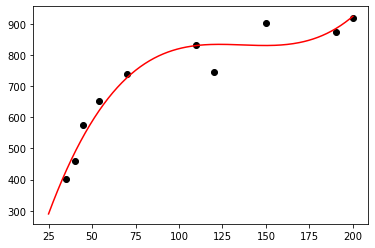

In [33]:
from sympy import *
import math
import pandas as pd
init_printing()
from scipy.optimize import fsolve
xi = zp
yi = ks

def equations(p):
    a, b, n, d  = p
    # Запись системы уравнений
    return ((-2*xi*(-a - b*xi**3 - d*xi - n*xi**2 + yi)).sum(), (-2*xi**2*(-a - b*xi**3 - d*xi - n*xi**2 + yi)).sum(), (-2*xi**3*(-a - b*xi**3 - d*xi - n*xi**2 + yi)).sum(), (2*a + 2*b*xi**3 + 2*d*xi + 2*n*xi**2 - 2*yi).sum())

# Численное решение системы уравнений
a, b, n, d  =  fsolve(equations, (1, 1, 1, 1))
print (a, b, n, d)

x = np.linspace(25, 200, 200)
y=a+b*x**3+n*x**2+d*x

plt.scatter(xi,yi, c='black')
plt.plot(x,y, c='r')

Видим, что кубический многочле лучше приближает график точек. Оценим насколько хороша наша модель на основе кубического многочлена

С помощью полученного уравнения посчитаем значения, предсказанные моделью значения скорингового балла заемщиков:

In [34]:
ks_pred = a+b*zp**3+n*zp**2+d*zp
ks_pred

array([426.83653126, 538.88292225, 883.62110157, 923.82407618,
       485.81863805, 726.18326392, 620.46577975, 829.97660592,
       833.49294578, 829.89813532])

Качество модели найдем с помощью средней ошибки аппроксимации $\overline {A}$:

In [35]:
A_mean = 100 * np.mean(np.abs((ks - ks_pred) / ks))
A_mean

Так как $\overline {A}$ равна 4,7%, что значительно ниже 8-10 %, то модель очень хорошо описывает эмпирические данные.

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(yi, ks_pred))
rmse

In [37]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(yi, ks_pred)

RMSE и MAE также у данной модели лучше чем у линейной. Т.е. апроксимация на основе кубического многочлена обеспечивает более качественные предсказания. Применяя этот подход на практике, нужно контролировать преобучение. 

##### 1.3. Посчитаем коэффициенты линейной регрессии, используя матричный метод

In [71]:
zp = zp.reshape((10, 1))
zp

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [72]:
ks = ks.reshape((10, 1))
ks

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [74]:
zp_i = np.hstack([np.ones((10,1)), zp])
zp_i

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [76]:
b_i = np.dot(np.linalg.inv(np.dot(zp_i.T, zp_i)), zp_i.T @ ks)
b = np.dot(np.linalg.inv(np.dot(zp.T, zp)), zp.T @ ks)
print(b_i)
print(b)

[[444.17735732]
 [  2.62053888]]
[[5.88982042]]


Видим теже коэффициенты d случае с интерсептом и другой коэффициент - без интерсепта. Посмотрим как это выглядет на графике

In [84]:
b_i[0]

array([444.17735732])

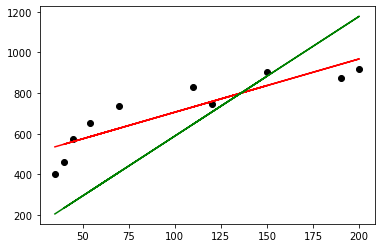

In [86]:
x = zp
y_i=b_i[0]+b_i[1]*x
y=b*x


plt.scatter(zp, ks, c='black')
plt.plot(x, y_i, c='r')
plt.plot(x, y, c='g')

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [88]:
from matplotlib import pylab as plt
import numpy as np
%matplotlib inline
from scipy.optimize import fsolve
import math
xi, yi, b, n =symbols('xi yi b n')
mse = (yi - b * xi)**2 / n
mse

In [89]:
print(f"Производная первого порядка по b: ", diff(mse,b))

Производная первого порядка по b:  -2*xi*(-b*xi + yi)/n


In [90]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [91]:
alpha = 1e-6

In [92]:
def mse(B1, y = ks, X = zp, n = 10):
    return np.sum((B1 * X - y)**2)/n

In [99]:
B1 = 10
n = 10
mse_p_list = []
for i in range(0, 500):
    B1 -= alpha * np.sum(-2*zp*(-B1*zp + ks))/n
    mse_p_list.append(np.sum(-2*zp*(-B1*zp + ks)/n))
    if i % 20 == 0:
        print(f"Iteration: {i}, B1 = {B1}, mse = {mse(B1)}, mse_p = {np.sum(-2*zp*(-B1*zp + ks)/n)}")
#         mse_p_list.append(np.sum(-2*zp*(-B1*zp + ks)/n))

Iteration: 0, B1 = 9.8867514, mse = 276604.34287384455, mse_p = 110128.23867447997
Iteration: 20, B1 = 8.175649111659467, mse = 128499.76985273242, mse_p = 62981.89510337564
Iteration: 40, B1 = 7.197076620784042, mse = 80059.94879955596, mse_p = 36019.09154778686
Iteration: 60, B1 = 6.6374349638104855, mse = 64216.979093757036, mse_p = 20599.17304486307
Iteration: 80, B1 = 6.317378159495538, mse = 59035.29832694914, mse_p = 11780.583904212464
Iteration: 100, B1 = 6.134338965197076, mse = 57340.5519462072, mse_p = 6737.268375868063
Iteration: 120, B1 = 6.029659588918414, mse = 56786.25973402847, mse_p = 3853.01658538685
Iteration: 140, B1 = 5.969793876221811, mse = 56604.97015585129, mse_p = 2203.524630314796
Iteration: 160, B1 = 5.935556916812233, mse = 56545.676681338155, mse_p = 1260.1868403108306
Iteration: 180, B1 = 5.915976937942634, mse = 56526.283861545686, mse_p = 720.6957665209875
Iteration: 200, B1 = 5.904779227072703, mse = 56519.94114908718, mse_p = 412.1629993796073
Iterat

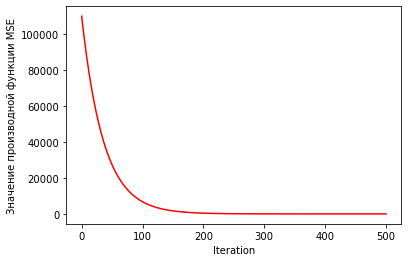

In [100]:
x = np.linspace(0, 500, 500)
y = mse_p_list

# plt.scatter(xi,yi, c='black')
plt.plot(x,y, c='r')
plt.xlabel('Iteration')
plt.ylabel('Значение производной функции MSE')
plt.show()

Посмотрим как будет выглядеть график линейной регресии бех интерсепта

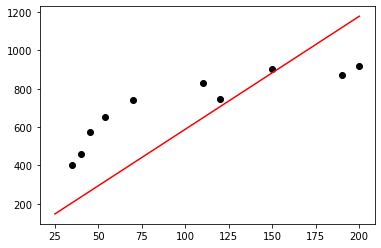

In [97]:
x = np.linspace(25, 200, 200)
y=B1*x

plt.scatter(zp, ks, c='black')
plt.plot(x,y, c='r')

Качество модели посмотрим с помощью средней ошибки аппроксимации $\overline {A}$:

In [98]:
ks_pred = B1*zp
A_mean = 100 * np.mean(np.abs((ks - ks_pred) / ks))
A_mean

Видим, что ошибка достаточно высока

#### 3. * (необязательная)Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [51]:
def mse(B1, A1, y = ks, X = zp, n = 10):
    return np.sum((B1 * X - y)**2)/n

In [52]:
from matplotlib import pylab as plt
import numpy as np
%matplotlib inline
from scipy.optimize import fsolve
import math
xi, yi, a, b, n =symbols('xi yi а b n')
mse = (yi - a - b * xi)**2 / n
mse

In [53]:
print(f"Производная первого порядка по a: ", diff(mse,a))

Производная первого порядка по a:  (2*b*xi - 2*yi + 2*а)/n


In [54]:
print(f"Производная первого порядка по b: ", diff(mse,b))

Производная первого порядка по b:  -2*xi*(-b*xi + yi - а)/n


In [55]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [56]:
alpha = 1e-6

In [57]:
def mse(B1, A1, y = ks, X = zp, n = 10):
    return np.sum((B1 * X + A1 - y)**2)/n

In [102]:
alpha_1 = 1e-5
alpha_2 = 1e-2
B1 = 10
A1 = 400
n = 10
mse_list = []
for i in range(0, 1501):
    A1 -= alpha_2 * np.sum(2*B1*zp - 2*ks + 2*A1)/n
    for j in range(0, 1501):
        B1 -= alpha_1 * np.sum(-2*zp*(-A1 - B1*zp + ks))/n

    mse_list.append(mse(B1, A1))
#     if mse_list[-1] <= mse(B1, A1):
#         print(f"Iteration: {i}, B1 = {B1}, A1 = {A1}, mse = {mse(B1, A1)}")
#         break
    if i % 100 == 0:
        print(f"Iteration: {i}, B1 = {B1}, A1 = {A1}, mse = {mse(B1, A1)}")
#         mse_p_list.append(np.sum(-2*zp*(-B1*zp + ks)/n))

Iteration: 0, B1 = 3.0493456150283818, A1 = 385.918, mse = 38380.03258033735
Iteration: 100, B1 = 2.8783907345768562, A1 = 409.1445976925886, mse = 42707.16587846615
Iteration: 200, B1 = 2.775591433146316, A1 = 423.1113122496693, mse = 46991.73651942278
Iteration: 300, B1 = 2.7137757286358872, A1 = 431.50983527489984, mse = 50176.55083414378
Iteration: 400, B1 = 2.676604451487642, A1 = 436.5600701541949, mse = 52311.64790547859
Iteration: 500, B1 = 2.6542524641443834, A1 = 439.59689844643486, mse = 53675.080180173056
Iteration: 600, B1 = 2.6408116739288485, A1 = 441.42301669577745, mse = 54523.70834825304
Iteration: 700, B1 = 2.632729401921274, A1 = 442.52110573462903, mse = 55044.40955163223
Iteration: 800, B1 = 2.6278693364223775, A1 = 443.1814132134466, mse = 55361.28052199094
Iteration: 900, B1 = 2.6249468615747813, A1 = 443.5784720594564, mse = 55553.18254806497
Iteration: 1000, B1 = 2.6231895068155158, A1 = 443.8172331400924, mse = 55669.06958475262
Iteration: 1100, B1 = 2.622132

Видим, что численным методом с интерсептом мы получили те же самые коэффициенты

Посмотрим как будет выглядеть график функции MSE

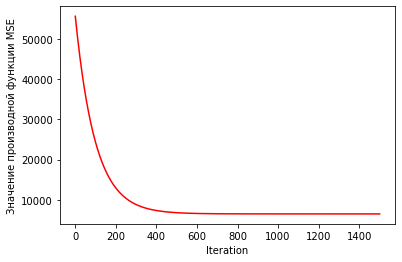

In [59]:
x = np.linspace(0, 1501, 1501)
y = mse_list

plt.plot(x,y, c='r')
plt.xlabel('Iteration')
plt.ylabel('Значение производной функции MSE')
plt.show()

Качество модели посмотрим с помощью средней ошибки аппроксимации $\overline {A}$:

In [60]:
ks_pred = A1 + B1*zp
A_mean = 100 * np.mean(np.abs((ks - ks_pred) / ks))
A_mean

Видим, что ошибка на уровне предыдущей модели линейной регрессии

#### 4. Выберите тему для проектной работы по курсу Теории вероятностей и математической статистики и напишите ее в комментарии к Практическому заданию.

Я выбираю тему "Линейная регрессия"